# Data Importing

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(font_scale=1)

In [3]:
# Importing the dataset
dataset = pd.read_csv('dataset/imdb_labelled.txt', delimiter = '\t', engine = 'python', quoting = 3, header=None)

In [4]:
dataset = dataset.rename(columns={0: "review", 1: "polarity"})

In [5]:
dataset.head()

,review,polarity
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [6]:
dataset.shape

(1000, 2)

In [7]:
n_rows = dataset.shape[0]

# Data Cleaning

In [8]:
# Importing the libraries
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\odilon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\odilon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
corpus = []
for i in range(0, n_rows):
    review = re.sub('[^a-zA-Z]', ' ', dataset['review'][i])
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [10]:
# Creating the bag of words
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tfidfVectorizer = TfidfVectorizer(max_features=2000)

In [12]:
X = tfidfVectorizer.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [13]:
X[0:10]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Let's build the classifier : Naive Bayes Classifier

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [17]:
# Model evaluation
predictions = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

In [18]:
cm

array([[71, 22],
       [47, 60]], dtype=int64)

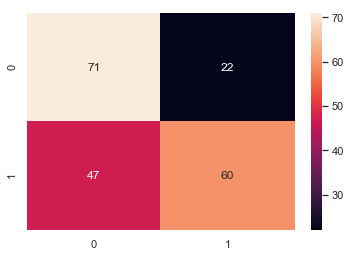

In [19]:
sns.heatmap(cm, annot=True, fmt='0g')

In [20]:
# Let's save the model
from sklearn.externals import joblib
joblib.dump(tfidfVectorizer, 'tfidfVectorizer.pkl')
joblib.dump(classifier, 'classifier.pkl')

['classifier.pkl']